In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('G:/Stuff/Mall_Customers.csv')

In [3]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

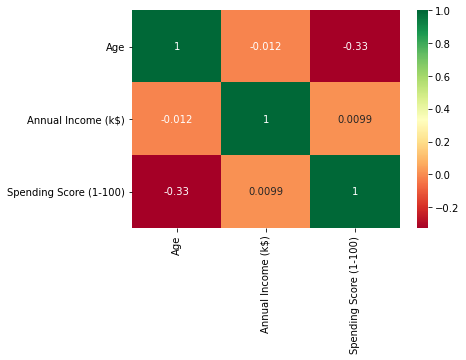

In [6]:
sns.heatmap(df.iloc[:,2:].corr(),annot=True,cmap='RdYlGn')

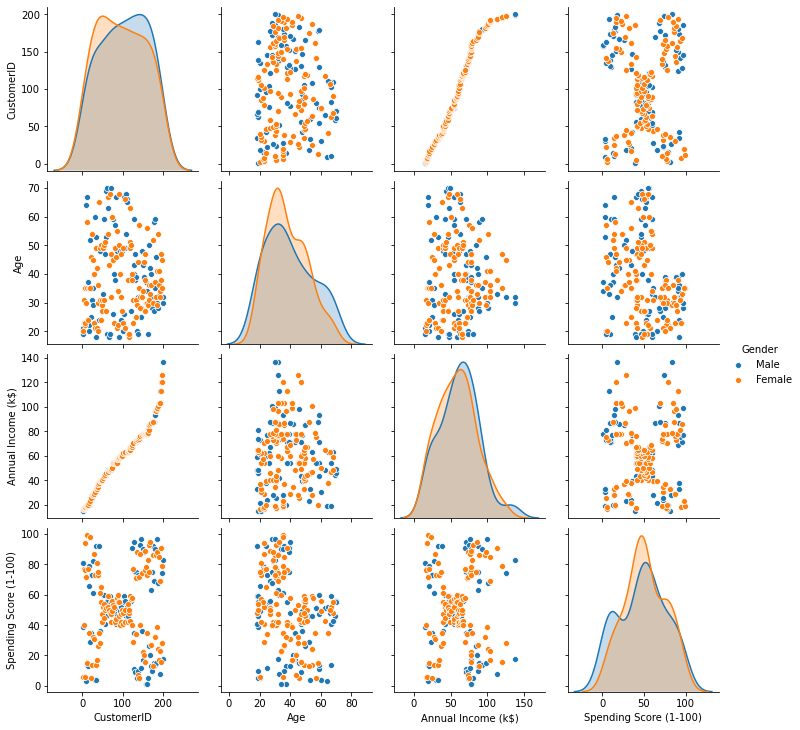

In [7]:
sns.pairplot(df,hue='Gender')

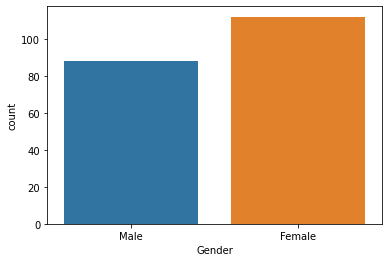

In [8]:
sns.countplot(df['Gender'])

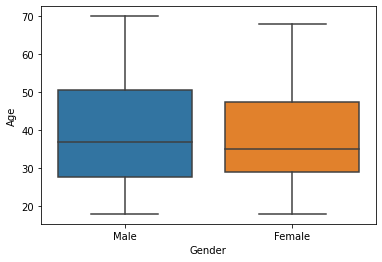

In [9]:
sns.boxplot(x='Gender',y='Age',data=df)

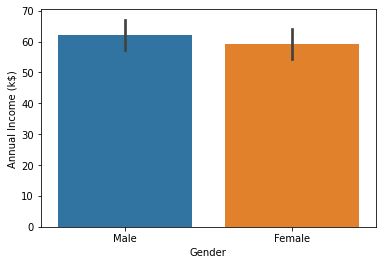

In [10]:
sns.barplot(x='Gender',y='Annual Income (k$)',data=df)

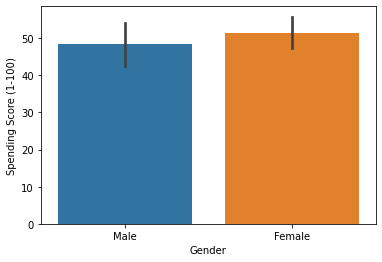

In [11]:
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)

Text(0, 0.5, 'Spending Score')

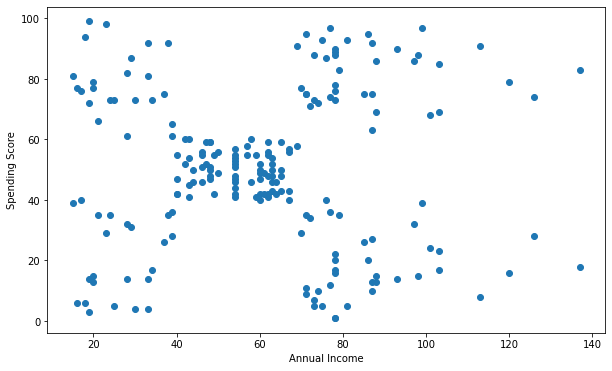

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler=MinMaxScaler()
sdata=scaler.fit_transform(df.iloc[:,3:])

In [15]:
sse=[]
k_values=range(1,10)
for i in k_values:
    km=KMeans(n_clusters=i)
    km.fit(sdata)
    sse.append(km.inertia_)

In [16]:
sse

[23.040720326039906,
 13.993505283127977,
 9.058985215159453,
 6.110312266413655,
 3.5831179059525606,
 3.100666377684788,
 2.6260623772655096,
 2.2336366724731898,
 1.8813567590019442]

Text(0.5, 1.0, 'Elbow Plot')

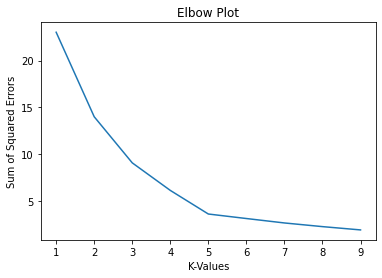

In [17]:
plt.plot(k_values,sse)
plt.xlabel('K-Values')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Plot')

In [49]:
km=KMeans(n_clusters=5)
km.fit(sdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
pred_target=km.predict(sdata)
pred_target

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2,
       0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4, 1, 2, 1, 4, 1, 4, 1,
       2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [51]:
df['pred_target']=pred_target

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),pred_target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [53]:
km.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.08792846, 0.79962894],
       [0.6       , 0.16443149]])

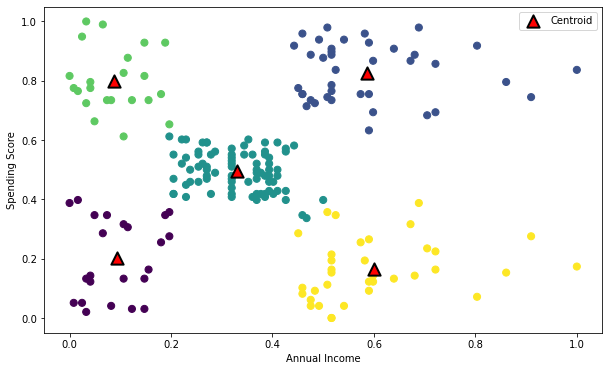

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(sdata[:,0],sdata[:,1],c=pred_target,s=50)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='^',linewidths=2,edgecolors='k',s=150,c='r',label='Centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

<Figure size 720x432 with 0 Axes>

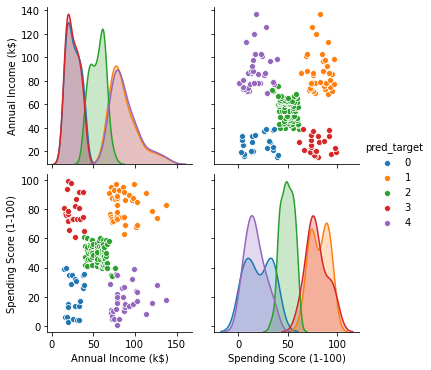

In [55]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df[['Annual Income (k$)','Spending Score (1-100)','pred_target']],hue='pred_target')

In [64]:
x=df[(df['pred_target']==0) | (df['pred_target']==2) | (df['pred_target']==4)]

In [65]:
x['pred_target'].value_counts()

2    81
4    35
0    23
Name: pred_target, dtype: int64

In [66]:
x.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'pred_target'],
      dtype='object')

In [67]:
x['CustomerID'].values

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  44,  45,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155,
       157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181,
       183, 185, 187, 189, 191, 193, 195, 197, 199], dtype=int64)

In [63]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score

In [70]:
(silhouette_score(df.iloc[:,3:5],pred_target)).round(4)

0.5539

## Summary

 - By observing the above scatter plot we can conclude that if mall owner specifically target classes 0,2 and 4 customers then he can benifit from them in the future 
 - By seeing class 1 and 3 customers their spending score is high so the mall owner can concentrate less on them 